**FLIGHT STATUS PREDICTOR PROJECT

*The goal of this project is to develop and deploy an ML model in which an end user can specify a set of features describing a commercial flight of interest and receive a categorical (yes or no) output indicating if the arrival time of that flight will be delayed more than fifteen minutes or not. 


**WEEK 1: CLEANING, FORMATING & EDA

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv('downsampled_data.csv')

In [3]:
# Check dataframe
df.head()

,Carrier_Name,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,...,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group
0,Spirit Air Lines,13,Saturday,2023-05-13,20416.0,N665NK,1201.0,14730.0,33044.0,SDF,...,0.0,703.0,Early Morning,0.0,0.0,0.0,243.0,1.0,1624.0,7.0
1,Southwest Airlines Co.,22,Monday,2023-05-22,19393.0,N8650F,2347.0,14107.0,30466.0,PHX,...,0.0,125.0,Early Morning,0.0,0.0,0.0,145.0,1.0,1044.0,5.0
2,Southwest Airlines Co.,17,Wednesday,2023-05-17,19393.0,N249WN,246.0,11193.0,33105.0,CVG,...,0.0,1430.0,Early Afternoon,0.0,0.0,0.0,85.0,1.0,430.0,2.0
3,Delta Air Lines Inc.,18,Sunday,2023-06-18,19790.0,N324DX,1127.0,10721.0,30721.0,BOS,...,0.0,1720.0,Afternoon,0.0,0.0,0.0,195.0,1.0,1124.0,5.0
4,United Air Lines Inc.,9,Friday,2023-06-09,19977.0,N26208,473.0,13930.0,30977.0,ORD,...,0.0,100.0,Early Morning,0.0,0.0,0.0,153.0,1.0,867.0,4.0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Carrier_Name                     0
Month_Day                        0
Week_Day                         0
Flight_Date                      1
Airline_DOT_ID                   1
Tail_Number                      1
Flight_Number                    1
Origin_Airport_ID                1
Origin_City_Market_ID            1
Origin_IATA_Code                 1
Origin_City_State                1
Destination_Airport_ID           1
Destination_City_Market_ID       1
Destination_IATA_Code            1
Destination_City_State           1
Dep_Time_Block_Group             1
Scheduled_Departure_Time         1
Dep_Delay_At_Least_15_Minutes    1
Scheduled_Arrival_Time           1
Arr_Time_Block_Group             1
Arr_Delay_At_Least_15_Minutes    1
Flight_Cancelled                 1
Flight_Diverted                  1
Scheduled_Gate_to_Gate_Time      1
Number_of_Flights                1
Distance_Miles                   1
Distance_Group                   1
dtype: int64


In [5]:
# Check columns to identify the target variable
print (df.columns)

Index(['Carrier_Name', 'Month_Day', 'Week_Day', 'Flight_Date',
       'Airline_DOT_ID', 'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time',
       'Dep_Delay_At_Least_15_Minutes', 'Scheduled_Arrival_Time',
       'Arr_Time_Block_Group', 'Arr_Delay_At_Least_15_Minutes',
       'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time',
       'Number_of_Flights', 'Distance_Miles', 'Distance_Group'],
      dtype='object')


In [6]:
# Define the target variable
target = 'Arr_Delay_At_Least_15_Minutes'

In [7]:
# Define feature variables excluding the target
features = [col for col in df.columns if col != target]
print (features)

['Carrier_Name', 'Month_Day', 'Week_Day', 'Flight_Date', 'Airline_DOT_ID', 'Tail_Number', 'Flight_Number', 'Origin_Airport_ID', 'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State', 'Destination_Airport_ID', 'Destination_City_Market_ID', 'Destination_IATA_Code', 'Destination_City_State', 'Dep_Time_Block_Group', 'Scheduled_Departure_Time', 'Dep_Delay_At_Least_15_Minutes', 'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights', 'Distance_Miles', 'Distance_Group']


*To avoid information leakage, it's essential to ensure that none of the features provide direct or indirect information about the arrival delay that wouldn't be available at the time of prediction.

Will drop 'Dep_Delay_At_Least_15_Minutes' as is highly likely to leak information about the target variable because departure delays often correlate strongly with arrival delays. Including this column would give the model access to information that is too directly related to the target.

Other Potential Columns to consider dropping are any columns that are calculated using data that would not be known until the flight has been completed or that provide direct information about the arrival delay should be excluded. These might include actual arrival times and any metrics or status indicators updated during or after the flight.

In [8]:
# Identify and drop columns that might cause leakage
leakage_columns = ['Dep_Delay_At_Least_15_Minutes', 'Arr_Time_Block_Group']
features = [col for col in df.columns if col not in leakage_columns + [target]]

In [9]:
# Split the data into features and target variables
X = df[features]
y = df[target]

In [10]:
# Handle missing values
X = X.dropna()

# Ensure y matches the index after dropping missing values
y = y.loc[X.index]  

# Check changes
print("Features:", X.columns)
print("Target:", y.name)

Features: Index(['Carrier_Name', 'Month_Day', 'Week_Day', 'Flight_Date',
       'Airline_DOT_ID', 'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Flight_Cancelled', 'Flight_Diverted',
       'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights', 'Distance_Miles',
       'Distance_Group'],
      dtype='object')
Target: Arr_Delay_At_Least_15_Minutes


In [11]:
# Identify num of delayed flights
num_delayed_flights = df[df[target] == True].shape[0]
print(f"Number of delayed flights: {num_delayed_flights}")

Number of delayed flights: 1127794


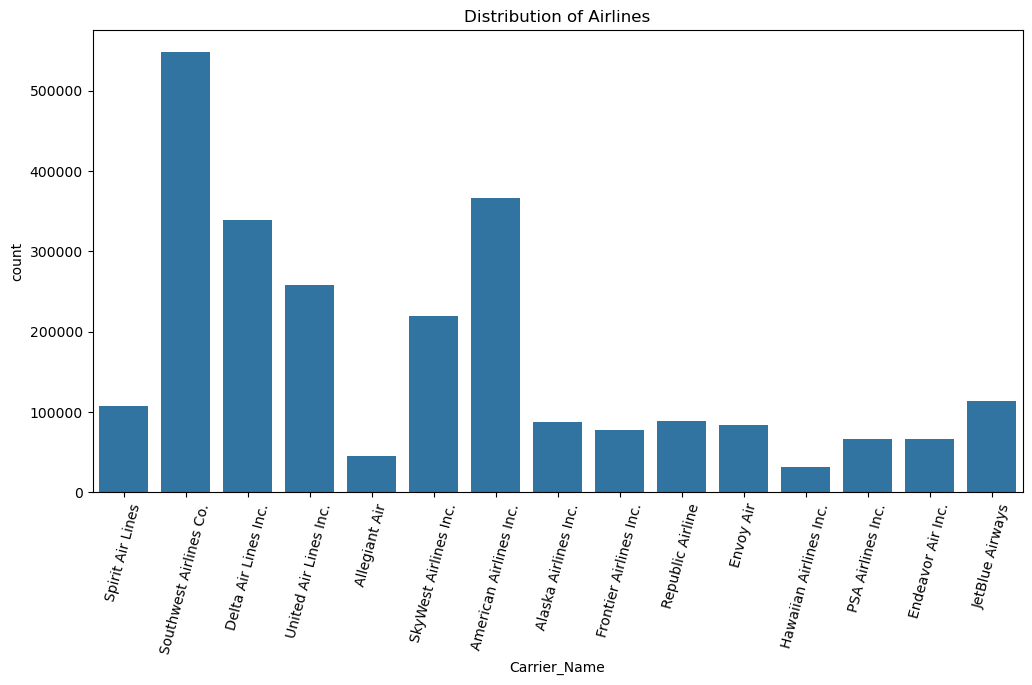

In [12]:
# Distribution of Airlines
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Carrier_Name')
plt.title('Distribution of Airlines')
plt.xticks(rotation=75)
plt.show()

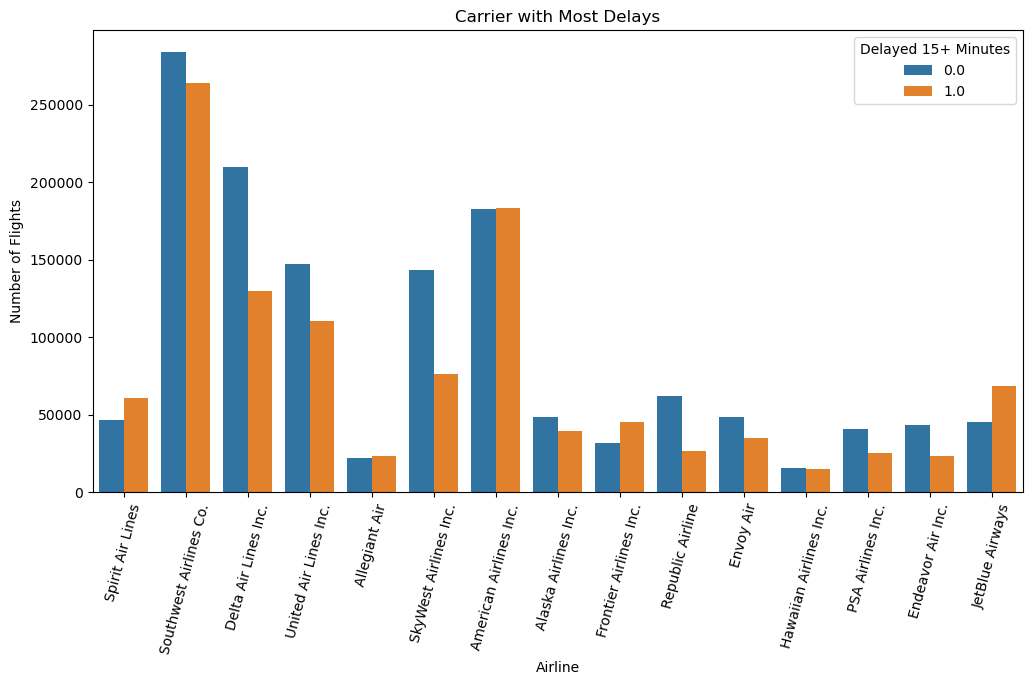

In [13]:
# Airlines with most delays 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Carrier_Name', hue=target)
plt.title('Carrier with Most Delays')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=75)
plt.legend(title='Delayed 15+ Minutes')
plt.show()

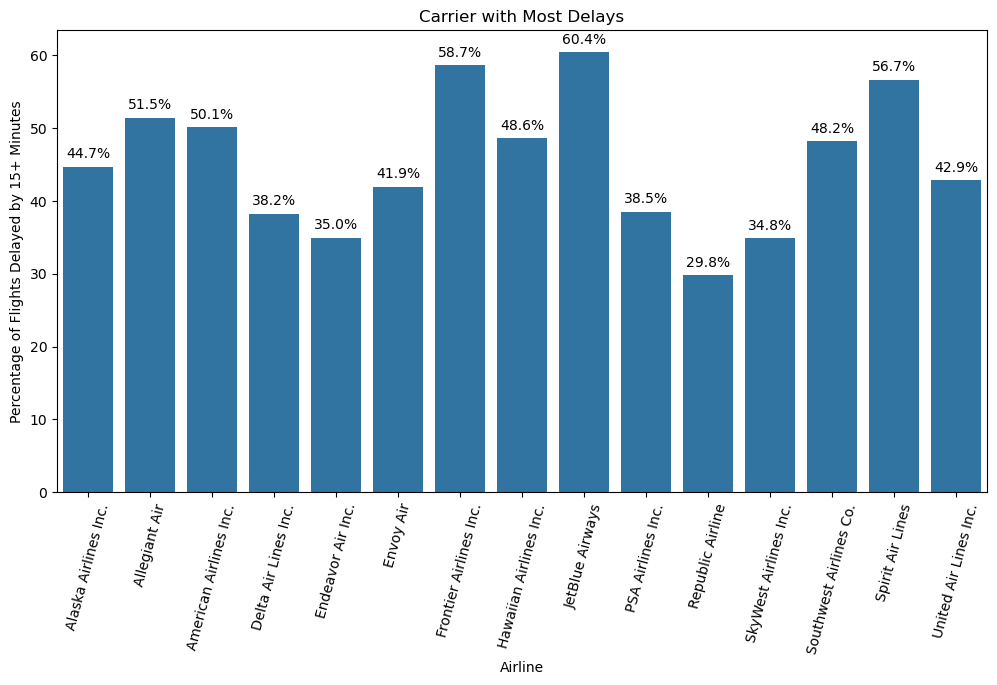

In [14]:
# Calculate the percentage of delays for each carrier
carrier_delay_percentages = df.groupby('Carrier_Name')[target].mean() * 100

# Reset index for plotting
carrier_delay_percentages = carrier_delay_percentages.reset_index()

# Plot the percentage of delays
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=carrier_delay_percentages, x='Carrier_Name', y=target)
plt.title('Carrier with Most Delays')
plt.xlabel('Airline')
plt.ylabel('Percentage of Flights Delayed by 15+ Minutes')
plt.xticks(rotation=75)

# Add percentage labels on the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()

##### FEATURE ENGINEERING & FEATURE SELECTION

In [15]:
# Import new libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

**Identify numerical and categorical variables

In [16]:
# Get data types of each column
data_types = X.dtypes

# Initialize lists to hold the names of categorical and numerical variables
categorical_vars = []
numerical_vars = []

# Identify numerical and categorical variables based on their data types
for column, dtype in data_types.items():
    if pd.api.types.is_numeric_dtype(dtype):
        numerical_vars.append(column)
    else:
        categorical_vars.append(column)

# Print the identified variables
print("Numerical Variables:")
print(numerical_vars)

print("Categorical Variables:")
print(categorical_vars)

Numerical Variables:
['Month_Day', 'Airline_DOT_ID', 'Flight_Number', 'Origin_Airport_ID', 'Origin_City_Market_ID', 'Destination_Airport_ID', 'Destination_City_Market_ID', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights', 'Distance_Miles', 'Distance_Group']
Categorical Variables:
['Carrier_Name', 'Week_Day', 'Flight_Date', 'Tail_Number', 'Origin_IATA_Code', 'Origin_City_State', 'Destination_IATA_Code', 'Destination_City_State', 'Dep_Time_Block_Group']


**Handling Outliers

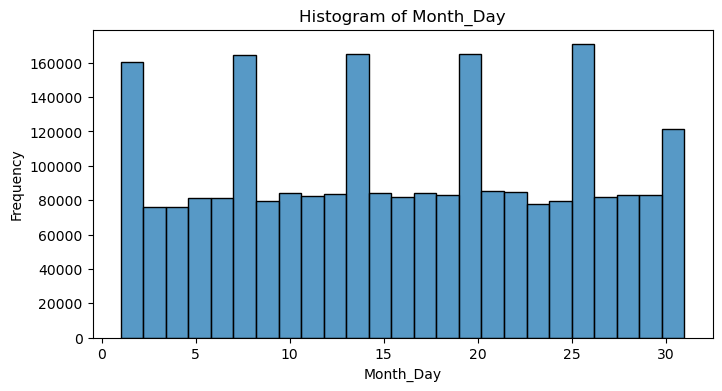

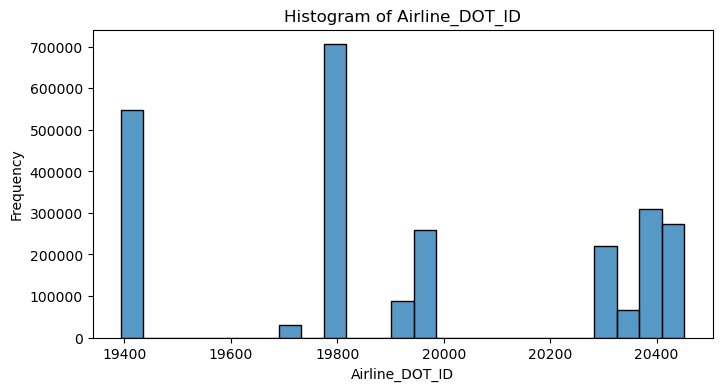

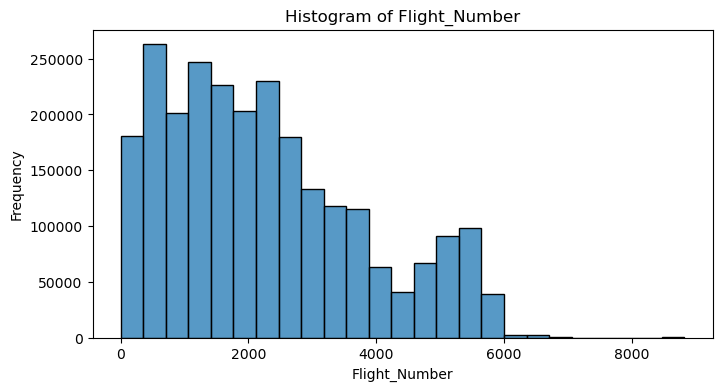

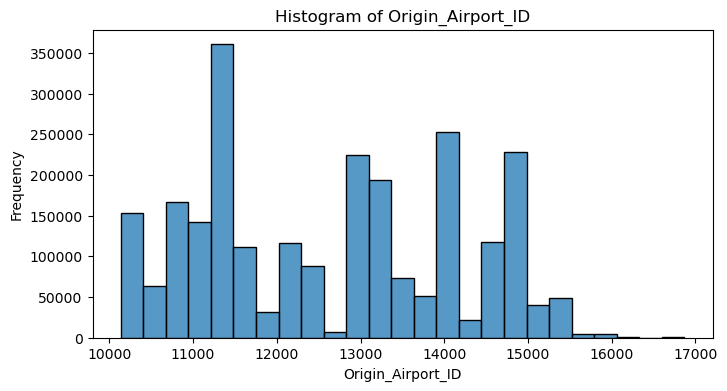

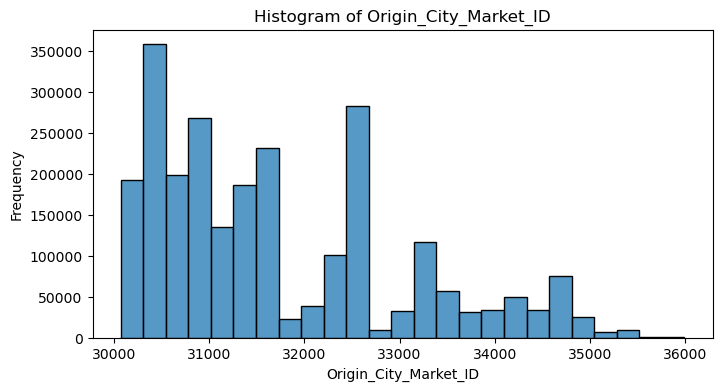

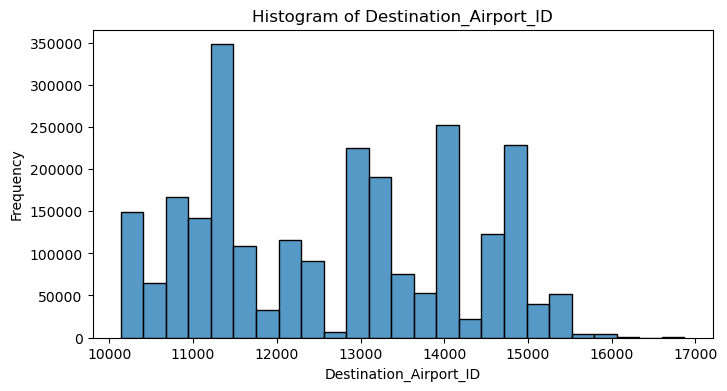

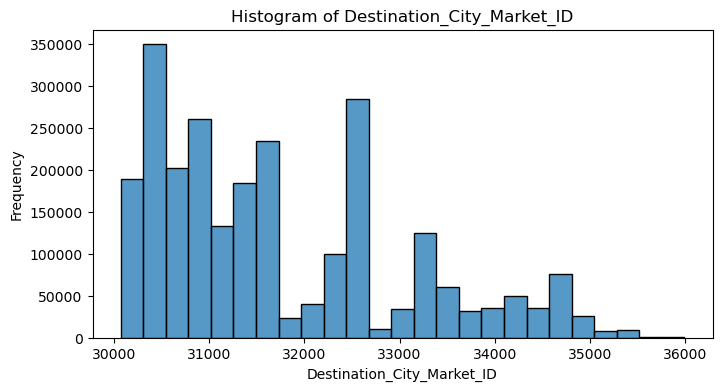

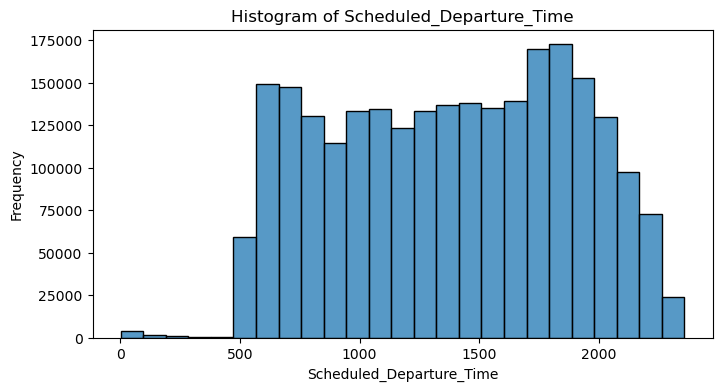

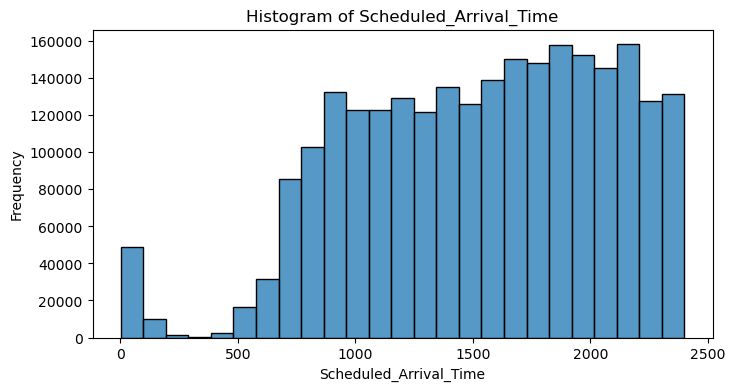

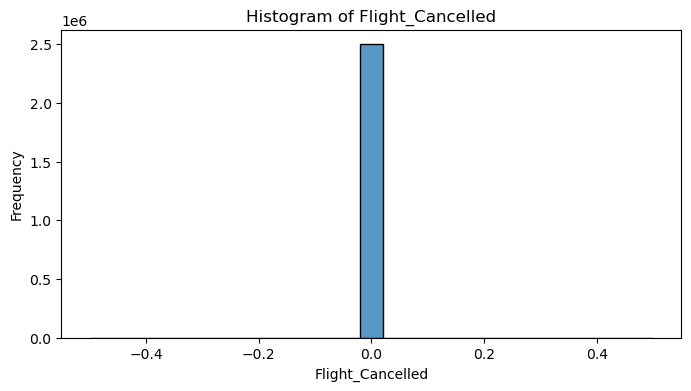

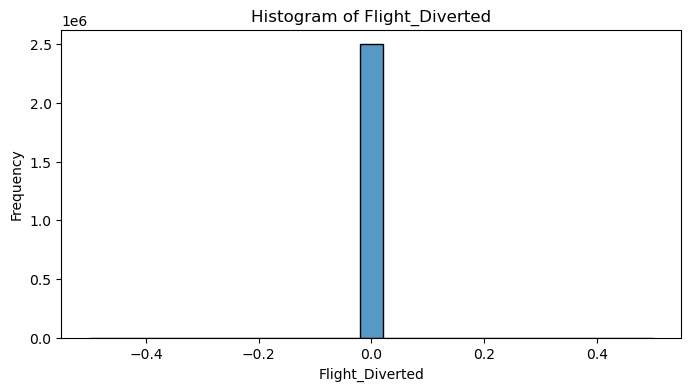

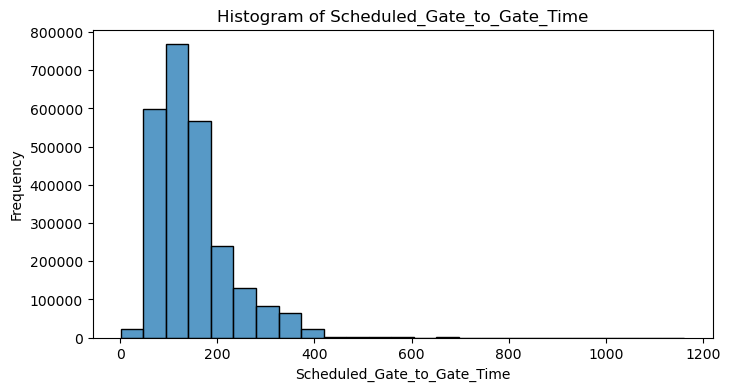

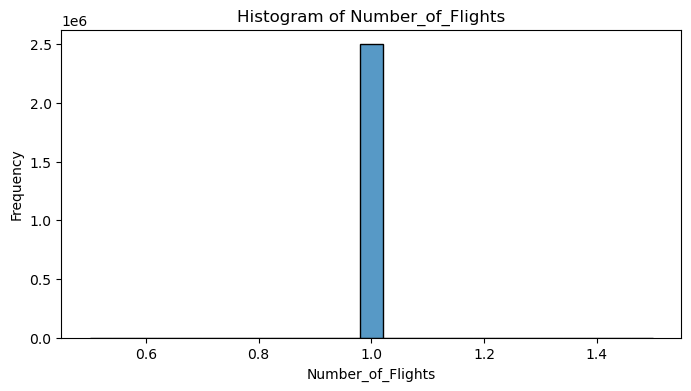

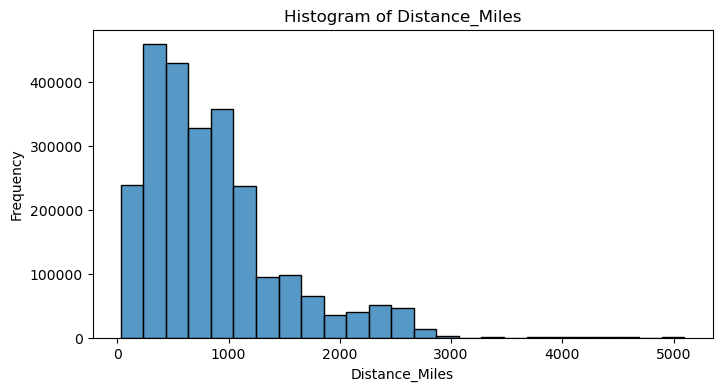

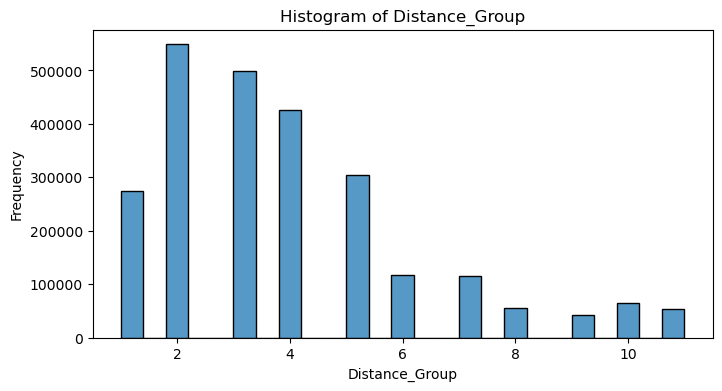

In [17]:
# Visualize the distribution of numerical features
for feature in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=False, bins=25)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [18]:
# Handle outliers by capping at the 99th percentile
for feature in numerical_vars:
    cap_value = X[feature].quantile(0.99)
    X[feature] = X[feature].apply(lambda x: min(x, cap_value))

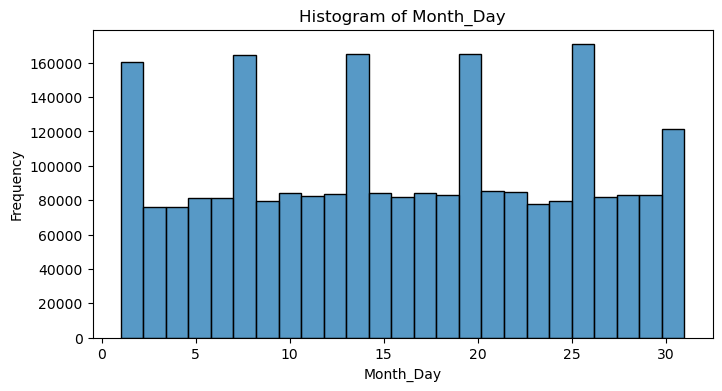

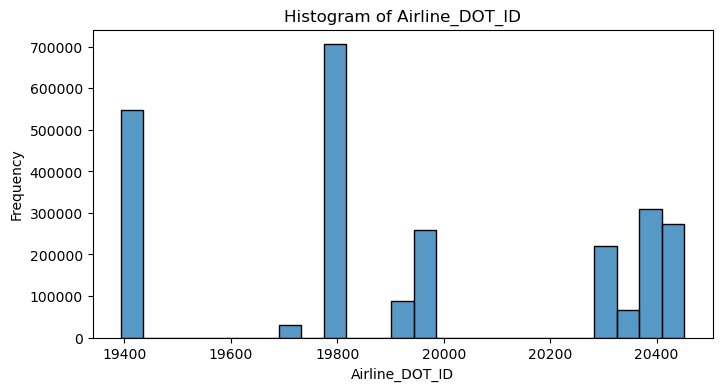

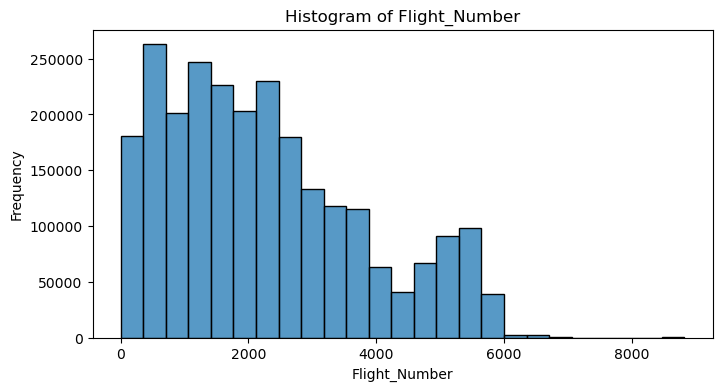

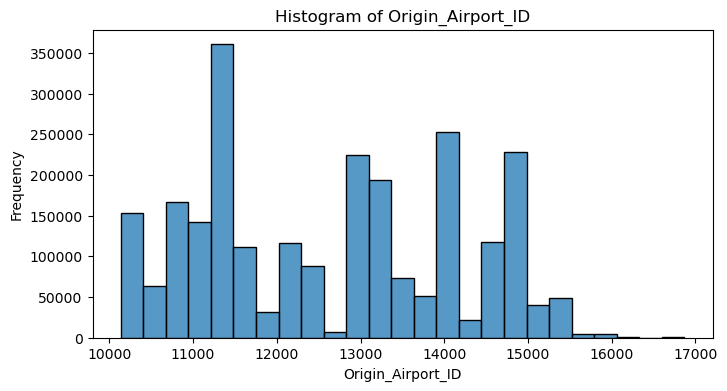

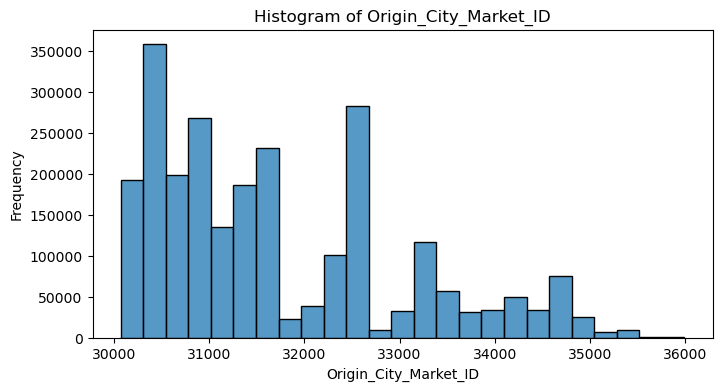

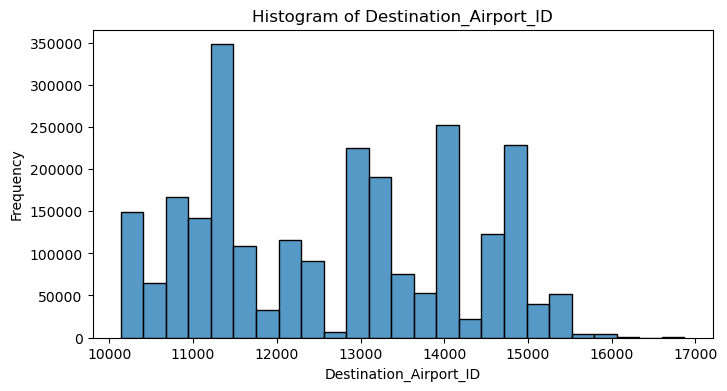

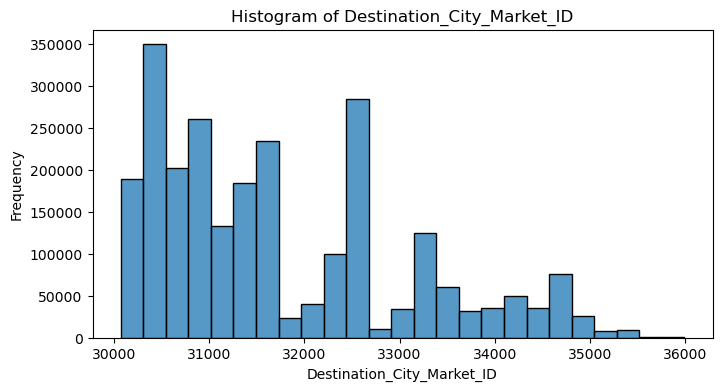

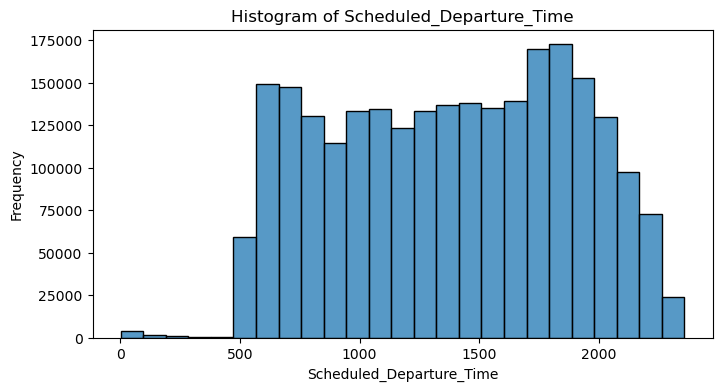

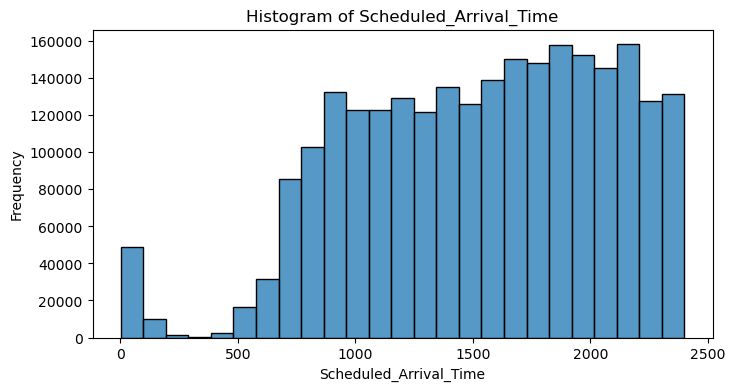

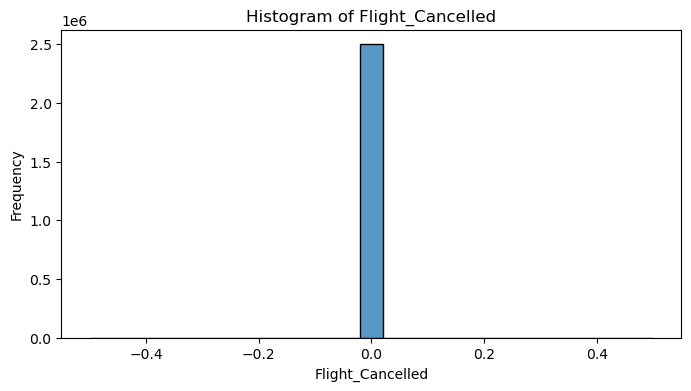

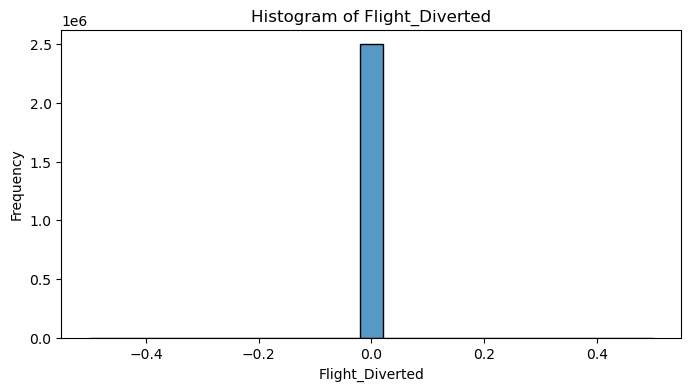

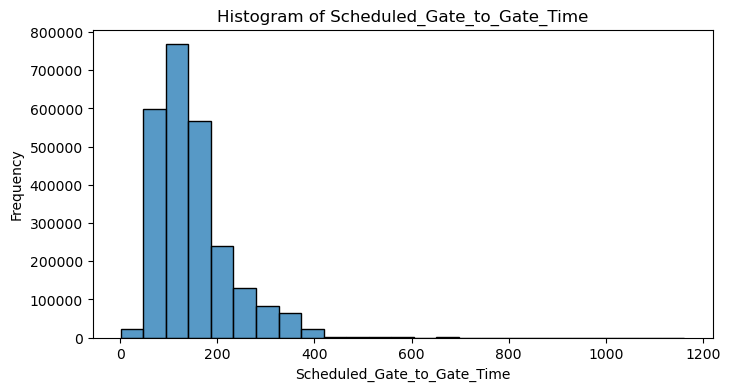

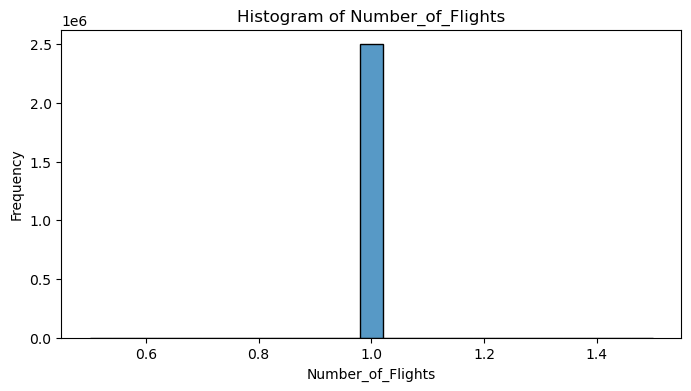

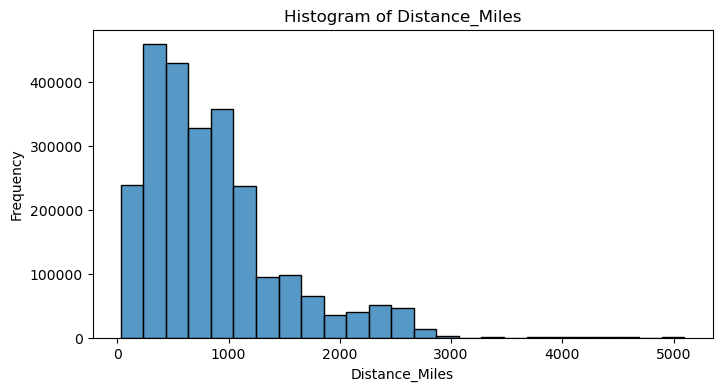

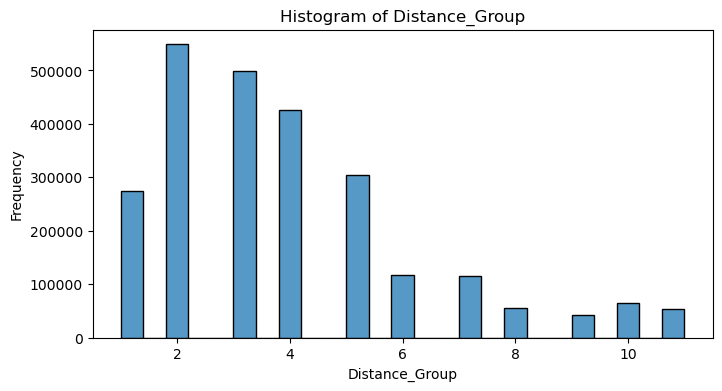

In [19]:
# Re-visualize the capped data
for feature in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=False, bins=25)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [20]:
# Create a correlation matrix
correlation_features = numerical_vars + [target]
correlation_matrix = df[correlation_features].corr()

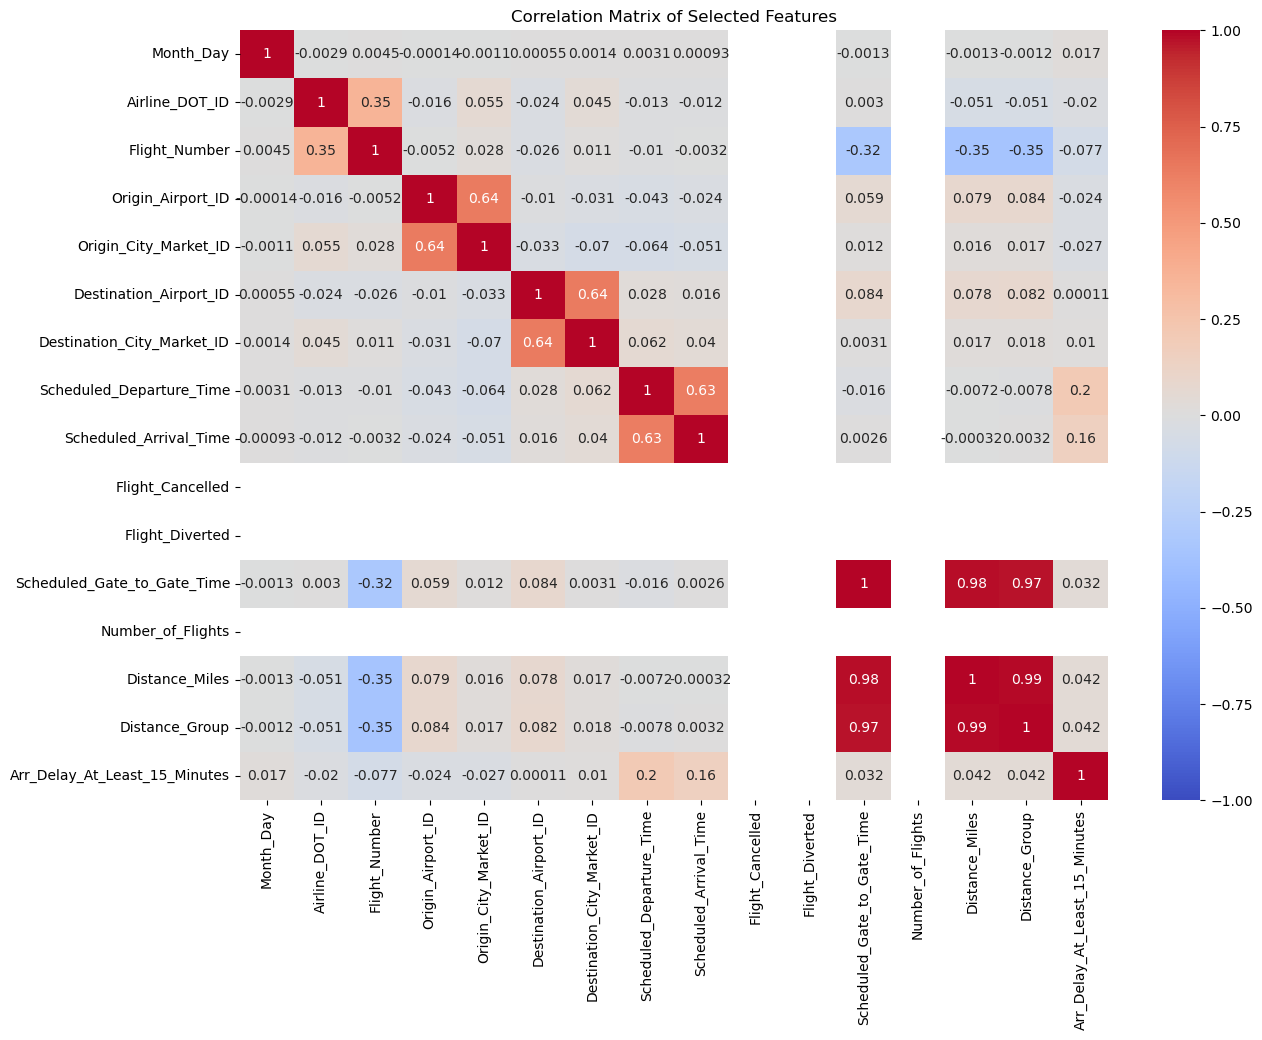

In [21]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Code optimisation due to RAM limitations
#Function to perform an in-place operation on a NumPy array
#Example: Squaring each element in-place
def inplace_operation(array): 
   array **= 2 
    
df = np.random.rand(10000, 10000) # Create a large array

view_of_df = df[:, :500]  # Use views instead of creating new arrays

#Call the in-place operation function on the view
inplace_operation(view_of_df) 

#Now 'large_array' has been modified in-place without creating a new array
#Display memory usage
print(f"Memory usage of the dataframe:", (df.nbytes)) 
Memory usage of the dataframe: 800000000

**Even with data type manipulation and code optimisation, memory error persists, will drop features based on Correlation Matrix visualisation and move on with a smaller dataframe

In [24]:
# Manually resize the "feature" variable X
features_to_keep = ['Origin_Airport_ID', 'Destination_Airport_ID', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
                   'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights', 'Distance_Miles', 'Distance_Group', 'Carrier_Name', 'Week_Day', 'Flight_Date', 
                   'Origin_IATA_Code', 'Destination_IATA_Code', 'Destination_City_State', 'Dep_Time_Block_Group']
X = X[features_to_keep].copy()
print(X.head())

   Origin_Airport_ID  Destination_Airport_ID  Scheduled_Departure_Time  \
0            14730.0                 12889.0                     600.0   
1            14107.0                 13198.0                    2100.0   
2            11193.0                 10821.0                    1305.0   
3            10721.0                 13487.0                    1505.0   
4            13930.0                 10721.0                    2127.0   

   Scheduled_Arrival_Time  Scheduled_Gate_to_Gate_Time  Number_of_Flights  \
0                   703.0                        243.0                1.0   
1                   125.0                        145.0                1.0   
2                  1430.0                         85.0                1.0   
3                  1720.0                        195.0                1.0   
4                   100.0                        153.0                1.0   

   Distance_Miles  Distance_Group            Carrier_Name   Week_Day  \
0          1624.0   

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Separate again features and target
X = X[features_to_keep].copy()
Y = target  

# Separate categorical and numerical columns
X_categorical = X[categorical_columns]
X_numerical = X.drop(columns=categorical_columns)

In [40]:
# Apply One-Hot Encoding with updated parameter
from sklearn.linear_model import SGDClassifier

# Optimize data types
X = optimize_data_types(X)

# Use a sample of the data
sample_fraction = 0.1  # Adjust based on your memory capacity
X_sample = X.sample(frac=sample_fraction, random_state=1)
Y_sample = Y.sample(frac=sample_fraction, random_state=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size=0.2, random_state=42)

# Apply One-Hot Encoding on the sample
onehot_encoder = OneHotEncoder(drop='first', sparse_output=True)
X_train_encoded = onehot_encoder.fit_transform(X_train)
X_test_encoded = onehot_encoder.transform(X_test)

NameError: name 'optimize_data_types' is not defined

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)


In [ ]:
# Baseline model
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)
baseline_accuracy = baseline_model.score(X_test, y_test)

print(f'Baseline Accuracy: {baseline_accuracy}')
